<h1 align="center">Restaurants Analytics</h1>

<br>

Importing essential libraries and loading the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Dataset.csv')

In [3]:
df = df.dropna().reset_index(drop=True)

<br>

## Level 2

### Task 1: Table Booking and Online Delivery

In [4]:
percent_table_booking = ((df[df['Has Table booking']=='Yes'].shape[0])/len(df))*100
percent_online_delivery = ((df[df['Has Online delivery']=='Yes'].shape[0])/len(df))*100

print('Percentage of restaurants that offer table booking:', f'{percent_table_booking:.2f}%')
print('Percentage of restaurants that offer online delivery:', f'{percent_online_delivery:.2f}%')
print('\n')

Percentage of restaurants that offer table booking: 12.14%
Percentage of restaurants that offer online delivery: 25.69%




In [5]:
df.groupby('Has Table booking')['Aggregate rating'].mean().round(1)

Has Table booking
No     2.6
Yes    3.4
Name: Aggregate rating, dtype: float64

Text(0.5, 1.0, 'Availability of Online Delivery by Price Range')

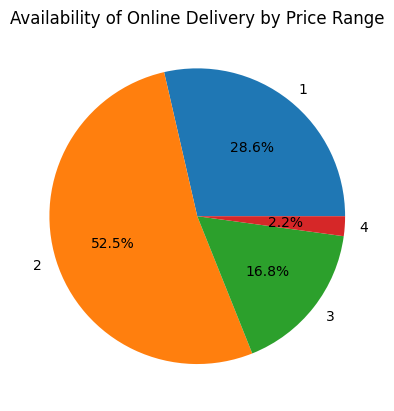

In [6]:
online_delivery = (df[df['Has Online delivery']=='Yes']).groupby('Price range')['Price range'].value_counts()

plt.pie(online_delivery, labels=online_delivery.index, autopct='%1.1f%%')
plt.title('Availability of Online Delivery by Price Range')

<br>

### Task 2: Price Range Analysis

In [7]:
price_range = df['Price range'].value_counts().sort_values(ascending=False)

print(price_range)
print('\n')
print('Most common price range among all the restaurants is', price_range.idxmax())
print('\n')

Price range
1    4438
2    3113
3    1405
4     586
Name: count, dtype: int64


Most common price range among all the restaurants is 1




In [8]:
avg_rating = df.groupby('Price range')['Aggregate rating'].mean().round(1).sort_values(ascending=False)
avg_rating

Price range
4    3.8
3    3.7
2    2.9
1    2.0
Name: Aggregate rating, dtype: float64

In [9]:
highest_rating_color = df[df['Aggregate rating'] == avg_rating.unique()[0]]['Rating color'].unique()[0]

print('The color that represents the highest average rating among different price ranges is', highest_rating_color)

The color that represents the highest average rating among different price ranges is Yellow


<br>

### Task 3: Feature Engineering

In [10]:
df['Restaurant Name Length'] = df['Restaurant Name'].str.len()
df['Address Length'] = df['Address'].str.len()

In [11]:
df[['Restaurant Name','Restaurant Name Length','Address','Address Length']].head()

,Restaurant Name,Restaurant Name Length,Address,Address Length
0,Le Petit Souffle,16,"Third Floor, Century City Mall, Kalayaan Avenu...",71
1,Izakaya Kikufuji,16,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",67
2,Heat - Edsa Shangri-La,22,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",56
3,Ooma,4,"Third Floor, Mega Fashion Hall, SM Megamall, O...",70
4,Sambo Kojin,11,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",64


In [12]:
df['Has Fast Food'] = df['Cuisines'].apply(lambda x: 'Yes' if 'Fast Food' in x else 'No')

In [13]:
df[['Cuisines', 'Has Fast Food']].head()

,Cuisines,Has Fast Food
0,"French, Japanese, Desserts",No
1,Japanese,No
2,"Seafood, Asian, Filipino, Indian",No
3,"Japanese, Sushi",No
4,"Japanese, Korean",No


<br>
Created new feature for fast food cuisine